<left>
    <a href=img><img src = "https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/Misc/1c86bfb3-cab0-4255-99bf-24c5488d888a-1632765661247.png?raw=true" width="400"  />
</left>

###### Developed by Tiago Moraes (13.02.2022)

# Data Science Test - Part III

----

The following notebooks presents the complete dataset analysis, exploration and pre-processing steps required to implement a tailored machine learning model designed to **predict the total minutes** ('total_minutes' label) it takes to a shopper to complete a given order.

For that, **3 different notebooks** were prepared for each task, as following:

- **[1. ETL process notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/1.ETL_-_Data_Science_Test.ipynb)** Complete ETL (data wrangling) process of the provided datasets, including feature engineering, feature transformations, and data standardizations, necessary to carry out all the statistics tests necessaries in the next phase;

- **[2. EDA notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/2.EDA_-_Data_Science_Test.ipynb)** Statistical exploration and understanding of the pre-processed dataset. Needed to define the best machine learning strategy for the target Label;

- **[3. Machine Learning Model development notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/3.ML_Model_-_Data_Science_Test.ipynb)** Build, train and test a ML model that takes in the process the dataset, generates a model and deploy it with unseen data to generate predictions ("total_minutes" label)
<br />
<br />

This notebook catches up from the previous one (2.EDA - Data Science Test.ipynb) and uses the processed file throughout the entire Machine Learning modeling process.

# 3. Machine Learning modeling - Model definition, training and serving


----

## 1. Importing necessary modules and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

### 1.1 Loading dataset "df_EDA.csv" obtained from the EDA notebook

After loading the df_EDA.csv into a dataframe called **df_EDA**, let's look at the first five rows using the `head()` function:

In [3]:
filename_EDA = r"C:\Users\tiago\OneDrive\00 Pessoal\Outros\Documentos\Python Scripts\Github\CS-s-Data-Science-Test/df_EDA.csv"
df_EDA = pd.read_csv(filename_EDA)
df_EDA.head()

,Unnamed: 0,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
0,0,1,1,19,0.9024,1.30,0.92,4.76,1.818407,67.684264
1,1,1,1,34,0.9024,1.30,0.92,4.76,0.961885,160.336211
2,4,0,4,29,0.8138,1.89,0.84,4.68,3.316783,94.734479
3,5,0,1,10,0.8456,1.93,0.96,4.80,2.704810,74.532256
4,6,0,1,7,0.8456,1.93,0.96,4.80,2.831756,91.192812


In [4]:
#removing the first column ("Unnamed: 0")
df_EDA.drop(['Unnamed: 0'], axis = 1, inplace = True)

## 2. Model definition

Given that this is a regresion problem, this section focused on building several different regression models and test their performance (r-squared and MSE wise). In the end, each model had its accuracy scores stacked against each other in order to define which one is the best to predict `total_minutes` label.</br>
</br>
Considering the wide diiferent types of regression models, teh following were chosen to be fully tested for this case:</br> 
</br>
2.1 Linear Regression</br>
</br>
2.2 Multivariate Linear Regression</br>
</br>
2.3 Polynomial Regression</br>
</br>
2.4 XGBoost</br>
</br>
2.5 Deep Neural Network (DNN)</br>

### 2.1. Linear Regression

The first model evaluated was the simple linear regression. For this model, the `order_size` feature was selected as the independent variable, since it showed the highest Pearson correlation coefficient during the EDA phase.

In [38]:
# Separating the data into features and target
XLR=df_EDA[['order_size']].values
yLR=df_EDA['total_minutes']
XLR.shape, yLR.shape

((7310, 1), (7310,))

Spliting the data into **training** and **testing** sets and build the ML models, where 20% of the total data are separated into a test dataset.

In [39]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(XLR, yLR, test_size = 0.2, random_state = 0)
X_trainLR.shape, y_testLR.shape, X_testLR.shape, y_trainLR.shape

((5848, 1), (1462,), (1462, 1), (5848,))

The Linear Regression ("regresssor") was built using scikit learn's `LinearRegresion()` function, as follows. In addition, some regression models evaluation parameters were chosen , in order to help the comparisson between different models

In [40]:
regressor = LinearRegression()
regressor.fit(X_trainLR, y_trainLR)
Y_predLR = regressor.predict(X_testLR)

ActVPred = pd.DataFrame({'Actual': y_testLR, 'Predicted': Y_predLR})
print(ActVPred)

#Evaluating trained Linear Regression model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testLR, Y_predLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_testLR, Y_predLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testLR, Y_predLR)))
print('R-square: = ', regressor.score(X_testLR, y_testLR))

          Actual   Predicted
5704   42.182726   60.569579
1921  100.251005   81.040004
6917   74.555331   59.365436
39     68.733380   73.815148
613    55.728748   93.081431
...          ...         ...
6270   33.601418   66.590292
276    73.287332   88.264860
6655   58.520109   59.365436
6309   63.443693  108.735286
401    78.350380   76.223434

[1462 rows x 2 columns]
Mean Absolute Error: 20.423629805771597
Mean Squared Error: 694.0734600430256
Root Mean Squared Error: 26.34527396029553
R-square: =  0.3230203766499511


After trained and evaluated, the produced model was plotted alongside the test set datapoints 

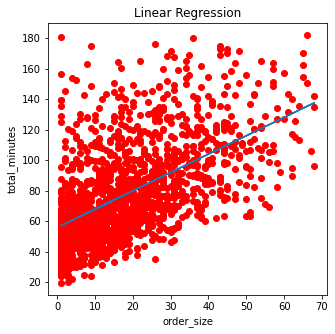

In [41]:
#Using Matplotlib's pyplot interface to plot the results
plt.plot(X_testLR,y_testLR, 'ro')
plt.plot(X_testLR, Y_predLR)
plt.xlabel('order_size')
plt.ylabel('total_minutes')
plt.title('Linear Regression')
plt.show()

In [42]:
#Using plotly's library to plot the interactive results
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x = df_EDA['order_size'], y = df_EDA['total_minutes'], title  = 'Completion Time vs Order Complexity', labels = {'x':'Order size', 'y':'Total minutes'})
fig.add_trace(go.Scatter(x = X_testLR.reshape(1462), y = Y_predLR, mode = "lines", name = "Model"))
fig.show()

### 2.2. Multivariate Linear Regression

The Multivariate Linear Regression, as the name implies, is a variation of the simple Linear Regression, that uses several independent variables as inputs. For this model, `order_size`, `distance_km` and `on_demand` were chosen based on correlation analysis developed in the previous notebook

In [10]:
# Separating the data into features and target
X_MLR=df_EDA[['order_size','distance_km','on_demand']].values
y_MLR=df_EDA['total_minutes']
X_MLR.shape, y_MLR.shape

((7310, 3), (7310,))

Spliting the data into **training** and **testing** sets and build the ML models, where 20% of the total data are separated into a test dataset.

In [11]:
X_train_MLR, X_test_MLR, y_train_MLR, y_test_MLR = train_test_split(X_MLR, y_MLR, test_size = 0.2, random_state = 0)
X_train_MLR.shape, y_test_MLR.shape, X_test_MLR.shape, y_train_MLR.shape

((5848, 3), (1462,), (1462, 3), (5848,))

The Multivariate Linear Regression ("MLR") was built using scikit learn's `LinearRegresion()` function, but passing in a X_MLR split, composed of three diferente independent variables. In addition, some models evaluation parameters were chosen , in order to help the comparisson between different models

In [12]:
MLR = LinearRegression()
MLR.fit(X_train_MLR, y_train_MLR)
Y_predMLR = MLR.predict(X_test_MLR)

ActVPred = pd.DataFrame({'Actual': y_test_MLR, 'Predicted': Y_predLR})
print(ActVPred)

#Evaluating trained Regression model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_MLR, Y_predMLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_MLR, Y_predMLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_MLR, Y_predMLR)))
print('R-square: = ', MLR.score(X_test_MLR, y_test_MLR))

          Actual   Predicted
5704   42.182726   60.569579
1921  100.251005   81.040004
6917   74.555331   59.365436
39     68.733380   73.815148
613    55.728748   93.081431
...          ...         ...
6270   33.601418   66.590292
276    73.287332   88.264860
6655   58.520109   59.365436
6309   63.443693  108.735286
401    78.350380   76.223434

[1462 rows x 2 columns]
Mean Absolute Error: 19.798908012131026
Mean Squared Error: 652.7338028885015
Root Mean Squared Error: 25.548655598455696
R-square: =  0.36334190908277886


After trained and evaluated, the followung plot shows how the fitted values (blue line) compares, proportionally, against the actual values in the test dataset (red line)

C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



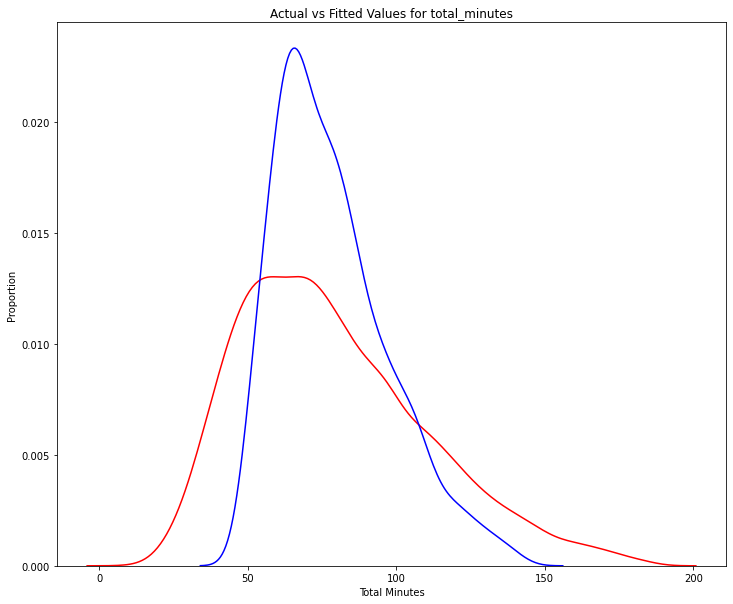

In [13]:
#Using Matplotlib's pyplot interface to plot the results
plt.figure(figsize=(12, 10))

ax1=sns.distplot(df_EDA['total_minutes'], hist=False, color='r',label='Actual Value')
sns.distplot(Y_predMLR, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title("Actual vs Fitted Values for total_minutes")
plt.xlabel('Total Minutes')
plt.ylabel('Proportion')

plt.show()
plt.close()

### 2.3. Polynomial

Sometimes, the trend of data is not really linear and can look rather curvy. In those cases, the Polynomial regression method can help fit the data into non linear functions (quadratic, cubic, and so on).

In [44]:
# Defining plotting function parameters
def PlotPolly (model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(60,1,200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new,y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for total minutes ~ order_size')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('total_minutes')

    plt.show()
    plt.close()

In [45]:
# Separating the data into features and target
X_Poly=df_EDA['order_size']
y_Poly=df_EDA['total_minutes']

Now after defining a plotting function and splitting the data into features and target, we can create a polynomial regression model

In [46]:
# Fitting Polynomial Regression to the dataset
f= np.polyfit(X_Poly,y_Poly,7) #7th order polynomial
p = np.poly1d(f)
print(p)

           7             6             5             4           3
4.471e-10 x - 1.252e-07 x + 1.417e-05 x - 0.0008199 x + 0.02536 x
           2
 - 0.4055 x + 4.2 x + 49.05


In [47]:
ActVPred = pd.DataFrame({'Actual': y_Poly, 'Predicted': p(X_Poly)})
print(ActVPred)

#Evaluating the model 
print('Mean Absolute Error:', metrics.mean_absolute_error(df_EDA['total_minutes'], p(X_Poly)))
print('Mean Squared Error:', metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly))))
print('R-square: = ', r2_score(y_Poly, p(X_Poly)))

          Actual  Predicted
0      67.684264  79.144890
1     160.336211  98.228026
2      94.734479  92.370681
3      74.532256  68.946004
4      91.192812  65.525061
...          ...        ...
7305   97.731233  60.782096
7306   71.825023  52.863717
7307   38.001058  52.863717
7308   84.933859  52.863717
7309   44.399626  52.863717

[7310 rows x 2 columns]
Mean Absolute Error: 20.309019566375675
Mean Squared Error: 672.2230705688407
Root Mean Squared Error: 25.9272650036374
R-square: =  0.32435304108227914


After trained and evaluated, the produced model was plotted alongside the test set datapoints 

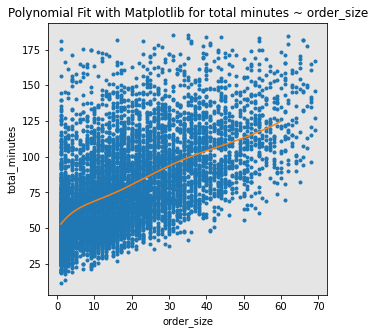

In [48]:
#Plotting the results
PlotPolly(p,X_Poly,y_Poly,'order_size')

### 2.4. XGBoost

XGBoost is a powerful approach for building supervised regression models and belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library

 First, the train and test set  are created for cross-validation of the results using the `train_test_split` function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.

In [20]:
#Selecting independent variables and the label for the model
X, y = df_EDA.iloc[:,:-1],df_EDA.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

Spliting the data into **training** and **testing** sets and build the ML models, where 20% of the total data are separated into a test dataset and fitting the model using `xgb.XGBRegressor()` method.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fitting Polynomial Regression to the dataset
xgb_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)
Y_pred = xgb_model.predict(X_test)

ActVPred = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
print(ActVPred)

#Evaluating the model 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-square: = ', xgb_model.score(X_test, y_test))


          Actual  Predicted
2681   61.447811  84.570740
2756   68.395656  64.489967
4379  113.777070  88.008919
6927   54.164115  54.379181
2488  127.804565  93.051765
...          ...        ...
3050   68.637045  58.745270
4394   91.749414  91.193268
1906  128.722035  94.412643
5432   44.856449  52.523155
6528   66.192795  46.121136

[1462 rows x 2 columns]
Mean Absolute Error: 18.447306863715212
Mean Squared Error: 572.1341422686337
Root Mean Squared Error: 23.919325706813595
R-square: =  0.43347210833632144


#### 2.4.1. XGBoost - Cross-validation

k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation

In [71]:
#3-fold cross validation
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [31]:
print((cv_results["test-rmse-mean"]).tail(1))

49    24.508457
Name: test-rmse-mean, dtype: float64


Even after performing a 3-fold cross-validation, the RMSE values didn't have a relevant increase, which may indicate that the chosen parameters are suitable for this case.

#### 2.4.2. XGBoost - Visualization

A popular way to visualize the XGBoost models is to examine the importance of each feature column in the original dataset within the model

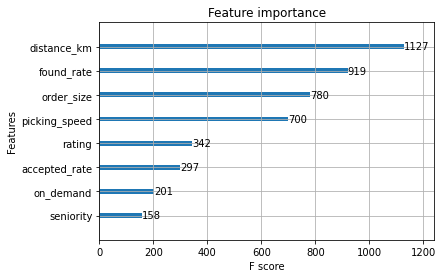

In [33]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

As it can be seen from the graph above, the feature `distance_km` has been given the highest importance score among all the features when using XGBoost models

### 2.5. Deep Neural Network - DNN 

Keras is one of the most popular deep learning libraries in Python for research and development because of its simplicity and ease of use. It uses the Tensorflow backend to build both shallow and deep models without adding much complexity.

#### 2.5.1. Deep Neural Network - Finding the best hyperparameters

In [50]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=12, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation="linear"))

model.compile(
    optimizer=Adam(),
    loss='MSE',
    metrics=[tf.keras.metrics.MeanSquaredError()]
    )

M= model.fit(X_train_MLR, y_train_MLR, batch_size=12, epochs = 100, verbose=1, validation_data=(X_test_MLR, y_test_MLR))

Epoch 1/100
488/488 [==============================] - 2s 2ms/step - loss: 3369.8369 - mean_squared_error: 3369.8369 - val_loss: 1428.0603 - val_mean_squared_error: 1428.0603
Epoch 2/100
488/488 [==============================] - 1s 1ms/step - loss: 1303.4891 - mean_squared_error: 1303.4891 - val_loss: 1210.7401 - val_mean_squared_error: 1210.7401
Epoch 3/100
488/488 [==============================] - 1s 1ms/step - loss: 1093.3429 - mean_squared_error: 1093.3429 - val_loss: 1008.2701 - val_mean_squared_error: 1008.2701
Epoch 4/100
488/488 [==============================] - 1s 1ms/step - loss: 921.4036 - mean_squared_error: 921.4036 - val_loss: 878.3133 - val_mean_squared_error: 878.3133
Epoch 5/100
488/488 [==============================] - 1s 1ms/step - loss: 838.5751 - mean_squared_error: 838.5751 - val_loss: 835.8918 - val_mean_squared_error: 835.8918
Epoch 6/100
488/488 [==============================] - 1s 1ms/step - loss: 804.3049 - mean_squared_error: 804.3049 - val_loss: 811.66

To evaluate a DNN, it's necesary to look deeper at the loss and MSE scores to see how well training's progressed and check if there's any underfit/overfit. To properly evaluate the model, we'll bring in the yet unseen test set. Afterwards we'll make a few round winner predictions based on the test data. The accuracy for the test set is 80%

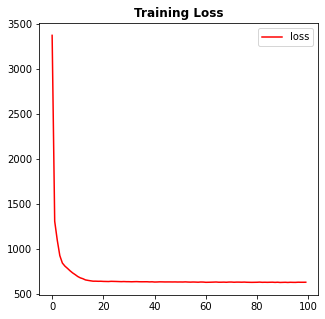

In [51]:
#Evaluating Loss function
plt.plot(M.history['loss'], label='loss',color='red')
plt.title(label='Training Loss', weight ='bold')
plt.legend();

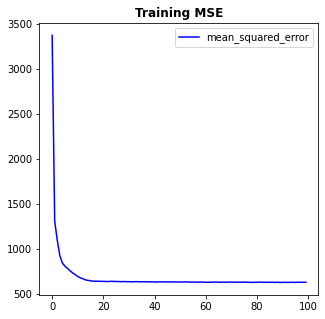

In [52]:
#Evaluating the training (Mean Squared Error)
plt.plot(M.history['mean_squared_error'], label='mean_squared_error',color='blue')
plt.title(label='Training MSE', weight ='bold')
plt.legend();

In [73]:
model.evaluate(X_test_MLR, y_test_MLR)

46/46 [==============================] - 0s 872us/step - loss: 639.9131 - mean_squared_error: 639.9131


[639.9130859375, 639.9130859375]

In [53]:
#Evaluating the model (R-squared)
yhat_DNN=model.predict(X_test_MLR, steps=1)
r2_score(y_test_MLR, yhat_DNN)
print('The R-square is: = ', r2_score(y_test_MLR, yhat_DNN))

The R-square is: =  0.37584682016852666


In [54]:
#Evaluating the model (Mean Squared Error)
mse_DNN = mean_squared_error(y_test_MLR,yhat_DNN,squared=True)
print('The Mean squared error of the total_minutes variable is: ', mse_DNN)

The Mean squared error of the total_minutes variable is:  639.9131409284479


### 2.6. Models' summary

In this section it´s presented the overall performance (R-squared and MSE wise) of each trained model and how they stack against each other

#### 2.6.1. R-Squared overall metrics

In [55]:
#Loading R-squared values from every trained model:
score_model_R2 = {
    'Simple Linear Regression':regressor.score(X_testLR, y_testLR),
    'Multivariate Linear Regression':MLR.score(X_test_MLR, y_test_MLR),
    'Polynomial Regression (7th order)':r2_score(y_Poly, p(X_Poly)),
    'XGBoost': xgb_model.score(X_test, y_test),
    'DNN': r2_score(y_test_MLR, yhat_DNN)
}

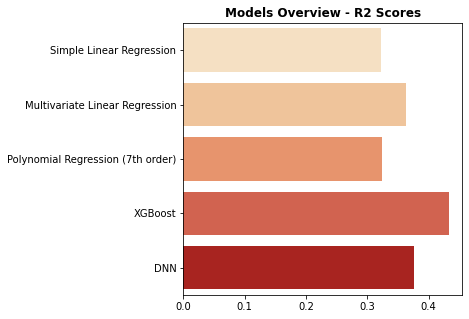

In [56]:
#Ploting R-squared values into a bar chart:
def models_overview(score_model_R2):
    
    model_accuracy = list(score_model_R2.values())
    model_name = list(score_model_R2.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='OrRd')
    plt.title('Models Overview - R2 Scores', weight='bold');
    return g
    
over_view = models_overview(score_model_R2)

#### 2.6.2. MSE overall metrics

In [57]:
#Loading MSE values from every trained model:
score_model_MSE = {
    'Simple Linear Regression':metrics.mean_squared_error(y_testLR, Y_predLR),
    'Multivariate Linear Regression':metrics.mean_squared_error(y_test_MLR, Y_predMLR),
    'Polynomial Regression (7th order)':metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly)),
    'XGBoost':metrics.mean_squared_error(y_test, Y_pred),
    'DNN':mean_squared_error(y_test_MLR,yhat_DNN,squared=True)
}

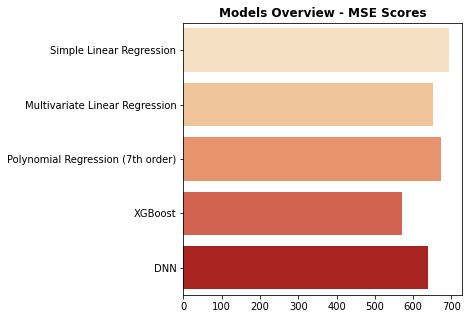

In [58]:
#Ploting MSE values into a bar chart:
def models_overview(score_model_MSE):
    
    model_metrics = list(score_model_MSE.values())
    model_name = list(score_model_MSE.keys())

    g = sns.barplot(x = model_metrics, y = model_name,palette='OrRd')
    plt.title('Models Overview - MSE Scores', weight='bold');
    return g
    
over_view = models_overview(score_model_MSE)

## 3. Conclusions

Based on the performance results, two models can be considered the best alternatives to make `total_minutes` label predictions: **XGBoost** and the **Deep Neural Network (with hyperparameter tuning)**.

Considering the chosen evaluation metrics (R-squared and MSE), both models outperformed every other tested model, displaying the lowest MSE values (21.89) and the highest R2 value.

A considerable downside of one of the **DNN model** is the high time demand necessary to run it, since it uses a series of hidden layers to perform its computation, at the same time that it outputs performance metrics that are are very similar to the **XGBoost** model metrics. 

Therefore, we conclude that the **XGBoost** model is the most suitable to predict the target `total_variable` variable and will be deployed in order to conclude the assignment and generate predicitions on missing `total_variable` label of the *df_TEST.csv* file.

## 4. Model serving

For this last section, we'll finally use the best model (R-squared and MSE wise) and deploy it, using the df_TEST.csv file, that was set apart from the rest of the original dataset, in order to make `total_minutes` predictions.The chosen model to do so, was the XGBoost model, which takes in all independente variables to be able to make the target prediction. 

### 4.1. Making predictions: ingesting df_TEST.csv

First, df_TEST.csv is loaded into a dataframe (features), in order to be consumed by the model:

In [60]:
features = pd.read_csv('https://raw.githubusercontent.com/tiagottmoraes/CS-s-Data-Science-Test/main/data/df_TEST.csv')

In [61]:
features.sample(2)

,Unnamed: 0,order_id,store_branch_id,shopper_id,store_lat,store_long,delivery_lat,delivery_long,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
1654,8197,dc5f6519dd4c1b54cd90f2e07132f46d,298f95e1bf9136124592c8d4825a06fc,ce08566f8d0bffa0eed0508c3418bc76,-36.817707,-73.033122,-36.822680,-73.035442,1,M,11,0.8748,1.06,0.76,4.96,0.589436,NaN
1842,9210,381ec732e3309aa7c9e5b1a57bcc4e53,7edfd52220e2032e7281061c82401195,a7eb5509333af0c5f2520e84c873cff0,-33.355349,-70.537662,-33.336256,-70.503568,1,M,2,0.8887,1.43,0.72,5.00,3.815388,NaN


Then, the necessary features are set apart and loaded into a `Xpred` array:

In [67]:
Xpred=features[['order_size','distance_km','on_demand']].values

In [100]:
#scaler = StandardScaler()
#Xpred = scaler.fit_transform(features.drop(['total_minutes','Unnamed: 0','order_id','store_branch_id','shopper_id','store_lat','store_long','delivery_lat','delivery_long'], axis=1))

The model is deployed and takes in `Xpred` as input to generate `total_minutes` predictions:

In [68]:
# make predictions on the entire test dataset
yhat = MLR.predict(Xpred)
# connect predictions with outputs

def Predictions():
    for i in range(1995):
    	print(Xpred[i],yhat[i])

### 4.2. Exporting predicted label

In [165]:
Predictions()

[38.          0.91634594  1.        ] 90.83822633211543
[32.          1.03314687  1.        ] 84.22472975943128
[41.          4.09963567  0.        ] 111.32182555007805
[17.          1.80010744  0.        ] 78.78267506278901
[6.         2.82470577 0.        ] 68.44046839087633
[43.         3.6192692  0.       ] 112.55543483322163
[3.         4.09963567 1.        ] 57.76229987778006
[13.          2.62173572  1.        ] 65.96244783352603
[23.          2.60798039  0.        ] 87.4299040368268
[13.          1.47501311  0.        ] 73.48740154350129
[7.         2.80250843 1.        ] 59.48965112552466
[14.          2.83867617  0.        ] 77.63171379761143
[11.          2.42200101  1.        ] 63.23302060091703
[67.          3.57963572  0.        ] 139.9498212883385
[58.          2.31205863  0.        ] 126.85632213652084
[39.          4.08690217  0.        ] 109.00368973604176
[42.          3.59935896  0.        ] 111.36657929696906
[12.          3.52108306  0.        ] 76.84247324552074


The predicted data is appended into the dataframe and exported to XXXXXXXXXXX, as a .csv file. Here is a sample of the output df.TEST, with all `total_minutes` predicted values:
